Topics:
- Lag
- Autocorrelation - ACF plots  
- Stationarity - trend, seasonality, making a series stationary.



Resources:

1. Forecasting: Principles and Practice (3rd ed) [link](https://otexts.com/fpp3/)
2. Stationarity, White noise notes: [link](https://ionides.github.io/531w16/notes03/notes3.html#:~:text=time%20series%20models.-,3.1%20Definition%3A%20Weak%20stationarity%20and%20strict%20stationarity,time%20is%20called%20strictly%20stationary.)

 - Strict and weak stationary: [link](https://www.asc.ohio-state.edu/de-jong.8/note1.pdf)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Time series example
data = pd.read_csv("https://tinyurl.com/3fh8j4x8")
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [ ]:
# convert date to pandas Date Time type
data["Date"] = pd.to_datetime(data["Date"])

# set Date as index
data.set_index(["Date"], inplace=True)

# resample the data to 1 day with forward fill
sampling_rate = data.index[1] - data.index[0]
data.resample(sampling_rate).mean().fillna(method="ffill")

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300.0,23.889999
2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100.0,23.830000
2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800.0,21.959999
2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800.0,19.200001
2010-07-03,23.000000,23.100000,18.709999,19.200001,5139800.0,19.200001
...,...,...,...,...,...,...
2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700.0,246.169998
2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500.0,258.000000
2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600.0,255.729996


**We are interented in the closing price**

In [ ]:
col = ["Close"]

# extract only the required column from the Data Frame
stock_price = data[col]

stock_price.head()

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001


<AxesSubplot:xlabel='Date'>

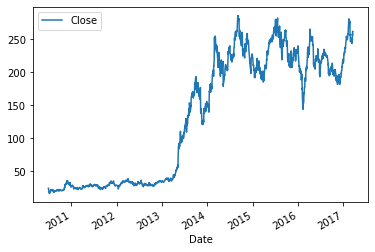

In [ ]:
stock_price.plot()

###**Lag**

Means to shift the times in its index backward one or more steps.

In [ ]:
pd.set_option('mode.chained_assignment',None)

In [ ]:
# compute 4 lags for the closing stock price and add these as
# additional columns to the Data Frame
lag_1 = stock_price.shift(-1)
lag_2 = stock_price.shift(-2)
lag_3 = stock_price.shift(-3)
lag_4 = stock_price.shift(-4)

stock_price.loc[:,["lag_1","lag_2","lag_3","lag_4"]] =[lag_1,lag_2,lag_3,lag_4]

stock_price

,Close,lag_1,lag_2,lag_3,lag_4
Date,,,,,
2010-06-29,23.889999,23.830000,21.959999,19.200001,16.110001
2010-06-30,23.830000,21.959999,19.200001,16.110001,15.800000
2010-07-01,21.959999,19.200001,16.110001,15.800000,17.459999
2010-07-02,19.200001,16.110001,15.800000,17.459999,17.400000
2010-07-06,16.110001,15.800000,17.459999,17.400000,17.049999
...,...,...,...,...,...
2017-03-13,246.169998,258.000000,255.729996,262.049988,261.500000
2017-03-14,258.000000,255.729996,262.049988,261.500000,NaN
2017-03-15,255.729996,262.049988,261.500000,NaN,NaN


<AxesSubplot:xlabel='Date'>

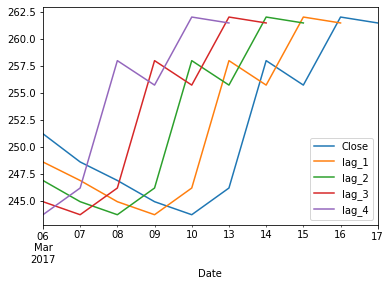

In [ ]:
#plot last 10 points
stock_price[-10:].plot()

### **Auto Correlation**

In [ ]:
from scipy.stats import pearsonr

stock_price.fillna(0, inplace = True)

# correlation of stock price with it's lagged version(lag=1)
stock_price["Close"].corr(stock_price["lag_1"])

0.9966432809953529

____________
**Task - 1**
____________

You are working as a data scientist at an investment company run. Your job is to analyse the stock prices and suggest the traders to either buy or sell a particular stock.

You have observed that Tesla's stock has gone up today. Would you suggest to buy/sell tesla shares today, tomorrow, day after or suggest not to take any action.



*   Check for correlation will past 4 lags to make the suggestion.


In [ ]:
for i in ["lag_1","lag_2","lag_3","lag_4"]:
  print(i, stock_price["Close"].corr(stock_price[i]))

lag_1 0.9966432809953529
lag_2 0.993209954061802
lag_3 0.9898870836258038
lag_4 0.9865736592925305


1. What would your suggestion be if you saw all negative vlues close to 0.9?

2. all values close to 0?

3. First 3 lags close to 0, but 4th lag is positive?

4. Today the price fell by 3 units, assume observed correlation values, what would you do tomorrow? (buy/sell)
___________________




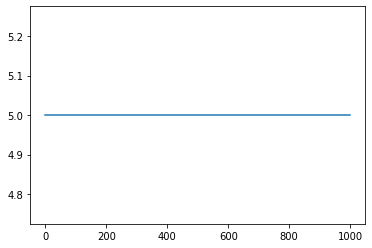

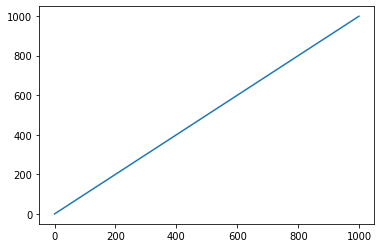

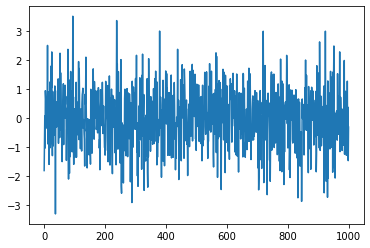

In [ ]:
plt.plot(np.arange(1000),np.repeat(5,1000), label="straight line")
plt.show()
plt.plot(np.arange(1000),np.arange(1000))
plt.show()
plt.plot(np.random.randn(1000))
plt.show()

____________
**Task - 2**
____________

Observe the above graphs and try to guess it's correlation with lag-1.

Calculate the actual correlation with it's 1st lag for each case, to see if you guessed it right.


In [ ]:
ts = pd.Series(np.arange(1000),np.repeat(5,1000))
ts.corr(ts.shift(-1))

1.0

In [ ]:
ts = pd.Series(np.arange(1000),np.repeat(5,1000))
ts.corr(ts.shift(-2))

1.0

___________________

####**ACF plot**

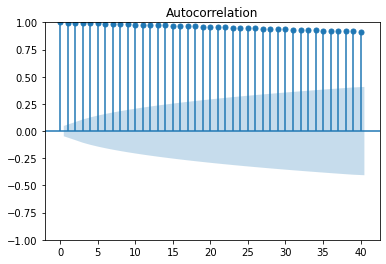

In [ ]:
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(data["Close"], lags=40)
plt.show()

________
Task - 3
________

Obtain the ACF plot for 3 the above three cases - graphs observed
 - A straight line with slope equal to 0.
 - A line with constant slope
 - Noise - Random values

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
/usr/local/lib/python3.9/dist-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


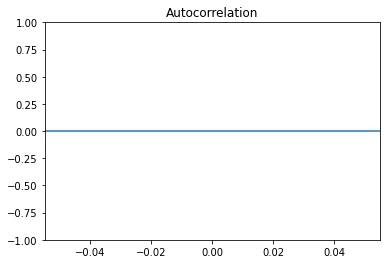

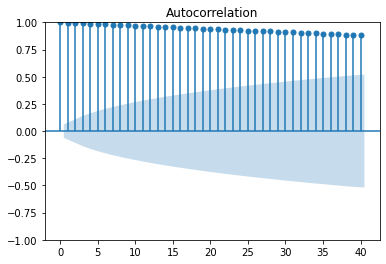

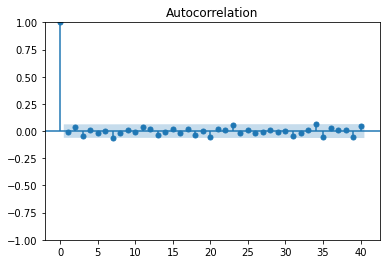

In [ ]:
sm.graphics.tsa.plot_acf(pd.Series(np.repeat(5,1000)), lags=40)
plt.show()
sm.graphics.tsa.plot_acf(pd.Series(np.arange(1000),np.arange(1000)), lags=40)
plt.show()
sm.graphics.tsa.plot_acf(pd.Series(np.random.randn(1000)), lags=40)
plt.show()

_____________

### **Stationarity**

A stationary time series is one whose statistical properties do not depend on the time at which the series is observed. Also known as weak stationary.

It has constant mean, variance and ACF.

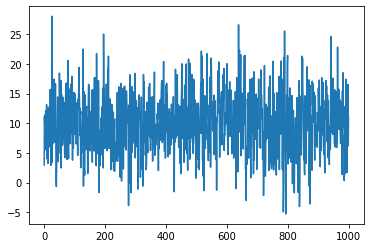

In [ ]:
# Gaussian White Noise

mu = 10
sigma = 5

gaussian = np.random.normal(mu, sigma, size=1000)

plt.plot(gaussian)

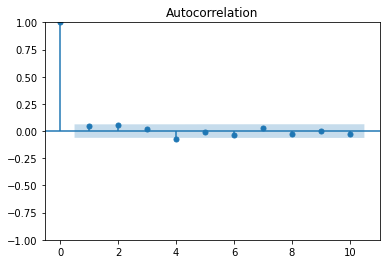

In [ ]:
# ACF plot for Gaussian white noise

sm.graphics.tsa.plot_acf(gaussian, lags=10)
plt.show()

####**Trend and Seasonality make series non stationary**

* **Tend**: It can be observerd from the graph that the overall sales have oncreased over the years. This is due to the trend or the cyclic-trend component. This data is said to have a increasing trend.
* **Seasonality**: Also, there are patterns that repeat every year. This is because of the seasonal component in the time series.
* **Residual**: whatever is left after removing the trend and seasonal components from the data is called residual.



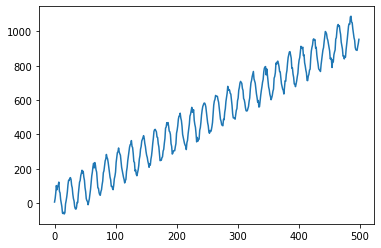

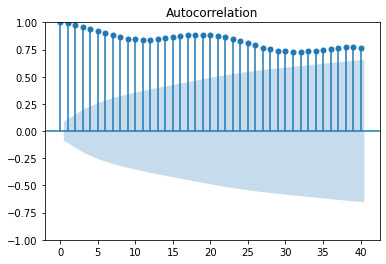

In [ ]:
# generate a sereis with trend and seasonality
len = 500
x = np.arange(len)

trend = x*(2)
seasonality = 100*np.sin(2*3.14*x/20)
noise = 10*np.random.randn(len)

ts =   trend + seasonality + noise

plt.plot(ts)
plt.show()

# ACF for a series with trend and seasonaity
sm.graphics.tsa.plot_acf(ts, lags=40)
plt.show()

____________
**Task - 4**
____________

Check the ACF plot for series with `only trend`, `only seasonality`. Are these series non-stationary, can you tell if a series is stationary by looking at the acf plots?

_____________

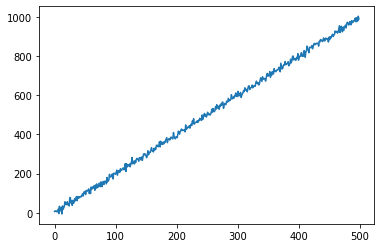

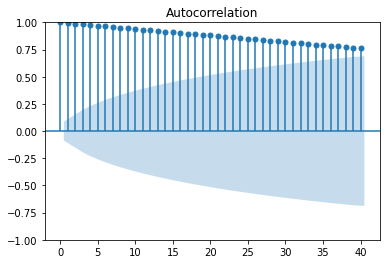

In [ ]:
# only trend
# generate a sereis with trend and seasonality
len = 500
x = np.arange(len)

trend = x*(2)
seasonality = 0
noise = 10*np.random.randn(len)

ts =   trend + seasonality + noise

plt.plot(ts)
plt.show()

# ACF for a series with trend and seasonaity
sm.graphics.tsa.plot_acf(ts, lags=40)
plt.show()

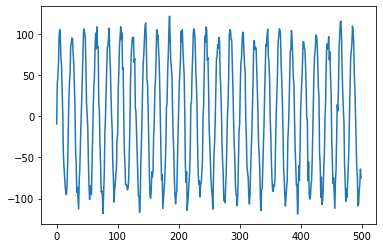

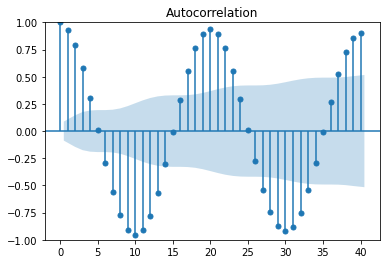

In [ ]:
# only seasonality
# generate a sereis with trend and seasonality
len = 500
x = np.arange(len)

trend = 0
seasonality = 100*np.sin(2*3.14*x/20)
noise = 10*np.random.randn(len)

ts =   trend + seasonality + noise

plt.plot(ts)
plt.show()

# ACF for a series with trend and seasonaity
sm.graphics.tsa.plot_acf(ts, lags=40)
plt.show()

#### **Differencing** - One way to make a series stationary.
 - 1st order differencing
 - 2nd order differencing

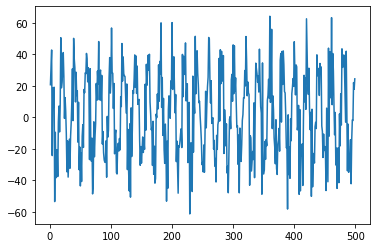

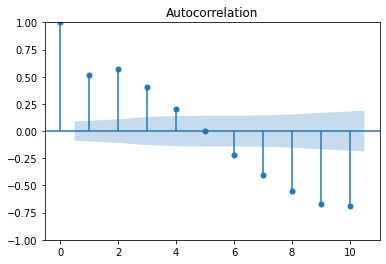

In [ ]:
ts_diff = pd.Series(ts).diff()

plt.plot(ts_diff)
plt.show()

sm.graphics.tsa.plot_acf(ts_diff.fillna(0), lags=10)
plt.show()

### PACF
It is the linear relationship between y(t) and y(t-k) after removing the effects of y(t-1), y(t-2)... y(t-k+1).

Each partial autocorrelation can be estimated as the last coefficient in an autoregressive model.

In [ ]:
# prepare data to use linear regression to predict y(t) using the past values
length = len(stock_price)
lag = 4

df_rearranged = pd.DataFrame()
j=0
for i in np.arange(0,length-1, lag+1):
  #print(stock_price.iloc[i:i+lag+1].values.squeeze())
  try:
    df_rearranged.loc[j,np.arange(lag+1)] = stock_price.iloc[i:i+lag+1].values.squeeze()
    j+=1
  except:
    continue

#print(df_rearranged)

df_rearranged.dropna(inplace=True)

# Consider 0 as the cariable to be predicted and rest as the features

y = df_rearranged.loc[:,0]
X = df_rearranged.loc[:,1:]
X

TypeError: ignored

In [ ]:
#lag 2 : pacf for lag two is the last coefficient of the autoreggresion model with lag 2
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.coef_

In [ ]:
# PACF plot using statmodels

import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(stock_price.values.squeeze(), lags=40, method="ywm")
plt.show()

#sm.tsa.stattools.pacf(stock_price.values.squeeze(), nlags=20)